# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

Marketing is crucial for the growth and sustainability of any business.
Marketers can help build the company’s brand, engage customers, grow revenue, and increase sales.
One of the key pain points for marketers is to know their customers and identify their needs.
By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs.
If data about the customers is available, data science can be applied to perform market segmentation. 

In this case study, you have been hired as a consultant to a bank in New York City. 
The bank has extensive data on their customers for the past 6 months. 
The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups.  


Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.stats as stats
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD
import os
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [3]:
creditcard_df = pd.read_csv('Marketing_data.csv')

# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [4]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
# Lets look at some statistics on the data points.
creditcard_df.info()
creditcard_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

In [7]:
# Let's see who made the max one off purchase of $40761!

creditcard_df[creditcard_df['ONEOFF_PURCHASES']== 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
# This customer has 101 purchase transactions 
# They have an $11,500 balance
# The customer does not use the cash advance alot but they make frequent purchases
# The customer only pays in full 25% of the time

In [9]:
# Let's see who made the max cash advance of $47137!

creditcard_df[creditcard_df['CASH_ADVANCE']== 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [10]:
# This customer made 123 cash advance transactions!!
# They appear to use the cash advance more than purchases for some reason
# Never paid the credit card in full

# TASK #3: VISUALIZE AND EXPLORE DATASET

<Axes: >

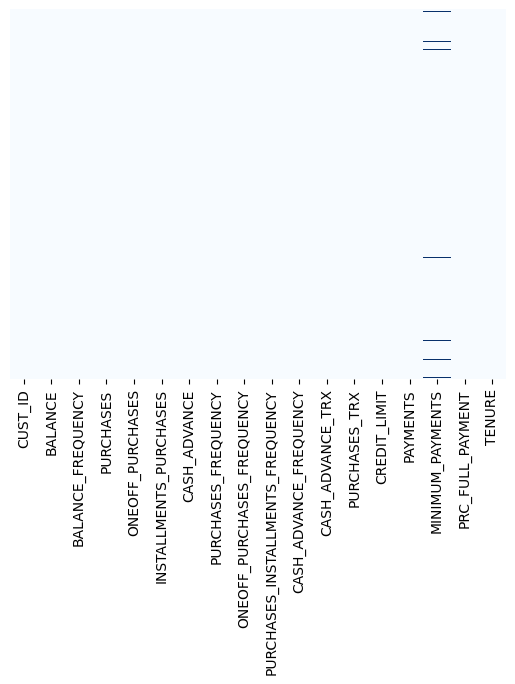

In [11]:
# Let's see if we have any missing data!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap= 'Blues')

In [12]:
# It appears that we have some missing data points for the Minimum_Payment variable.
# Let's run a summary of the data to see if there are any missing data points the visual is not showing us.

creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
# We have 1 missing data point for Credit_Limit
# We have 313 missing data points for Minimum_Payment

In [14]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True),'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [15]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True),'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [17]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [19]:
# We have no duplicate records.

In [20]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [21]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
# After droping the Cust_ID column, there are 17 columns left.

creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [23]:
# Let's create some visuals for the dataset.

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


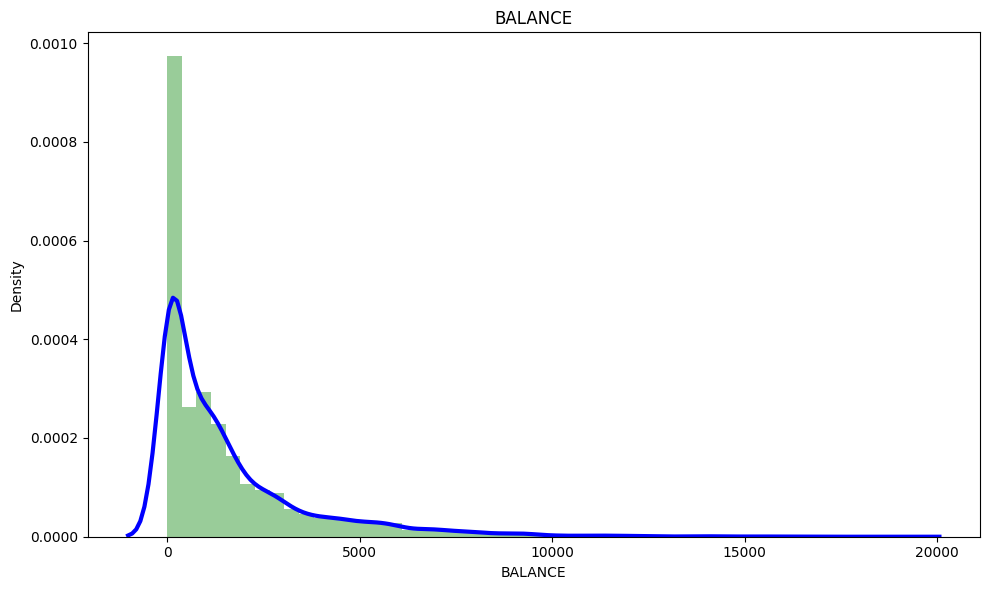

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


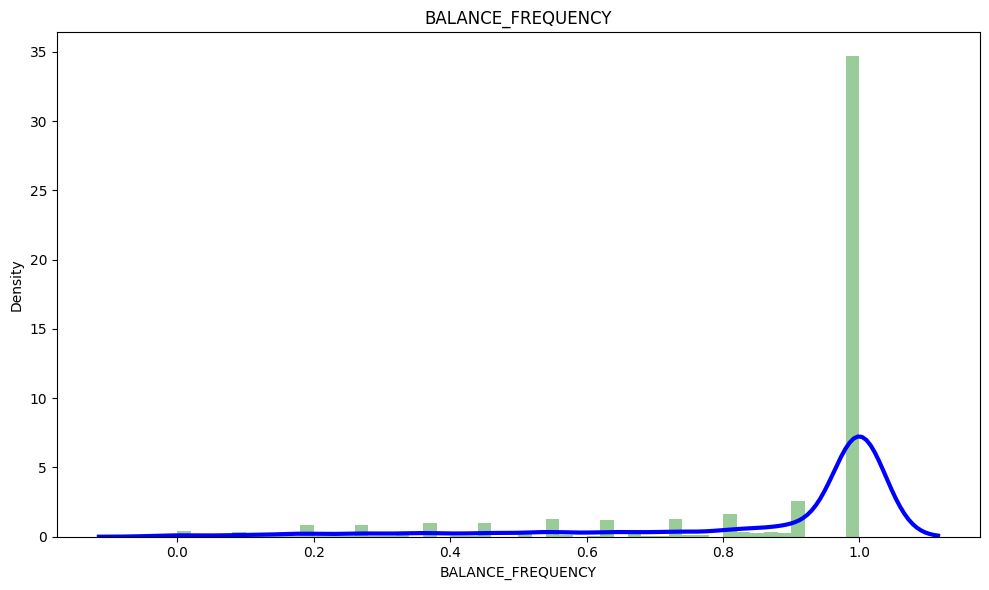

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


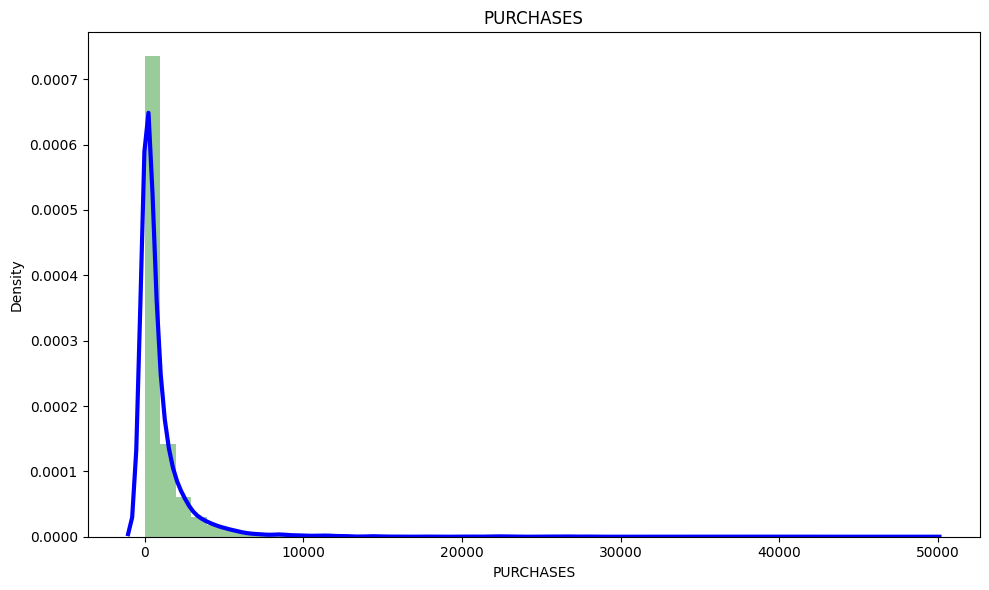

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


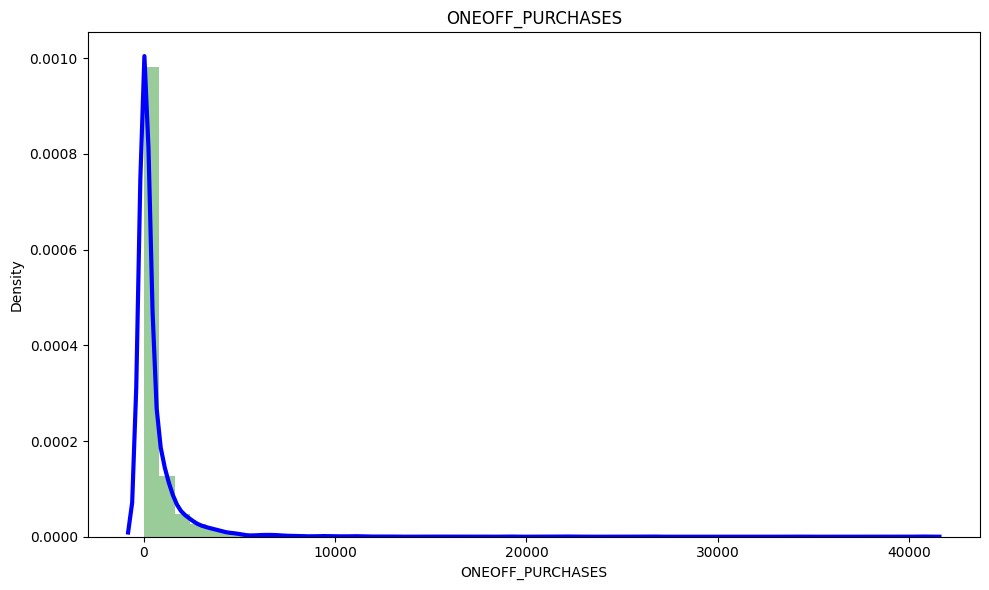

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


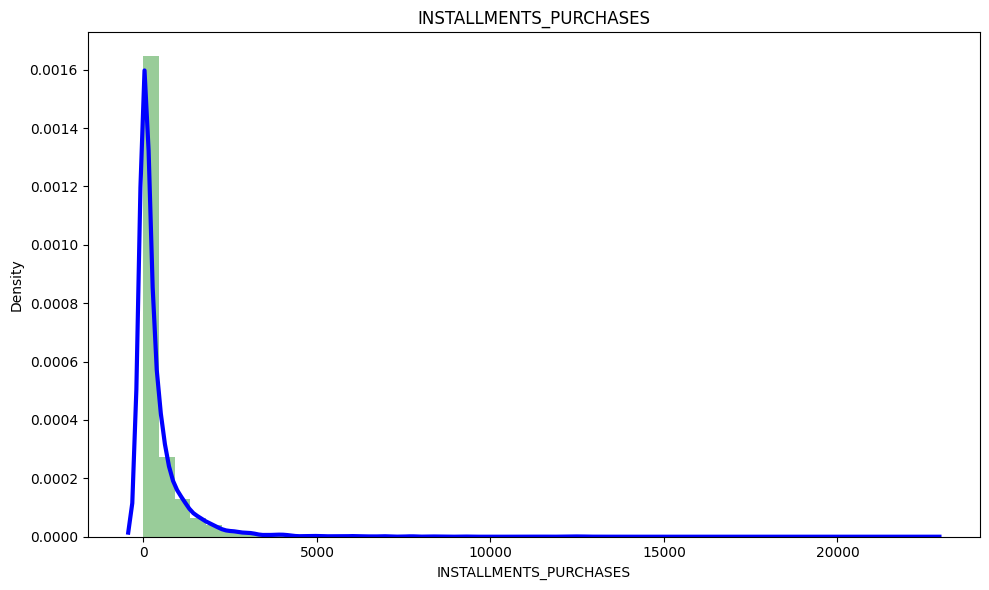

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


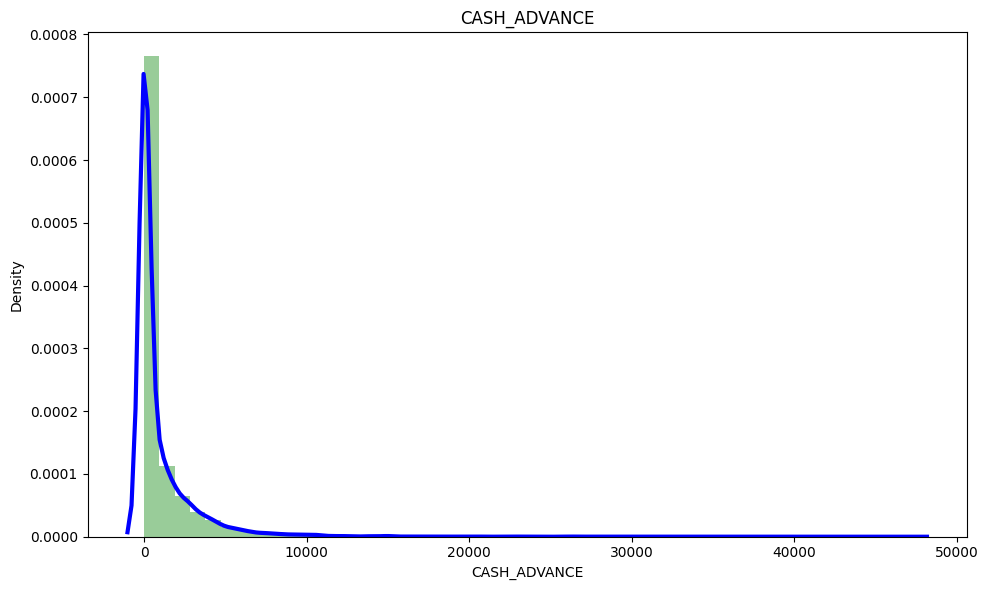

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


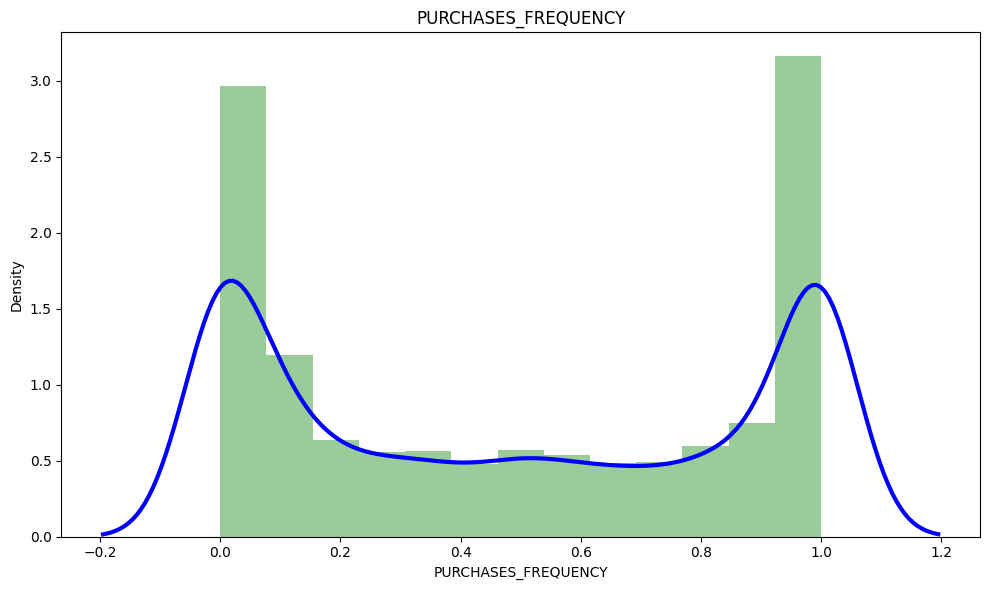

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


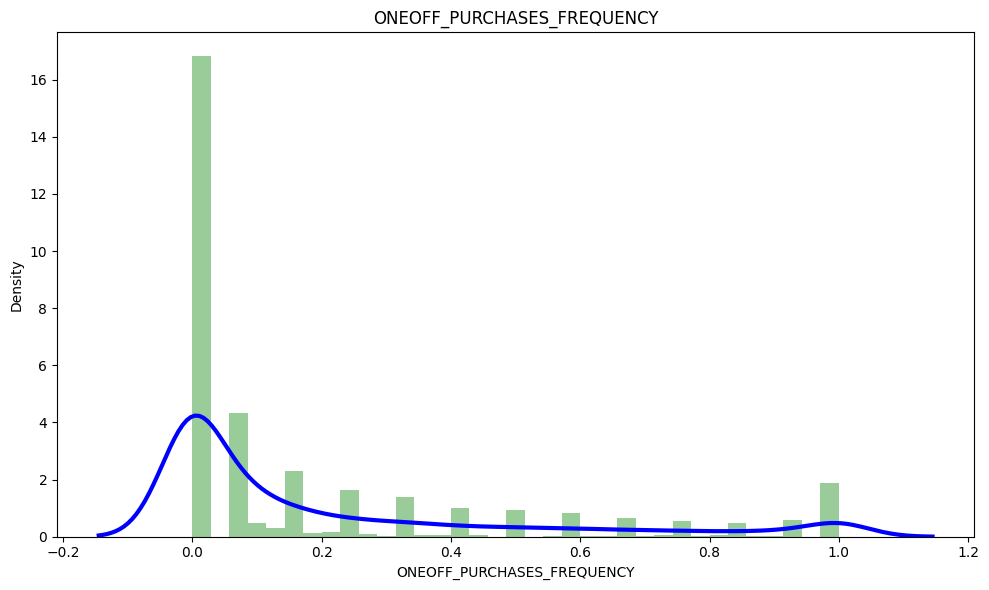

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


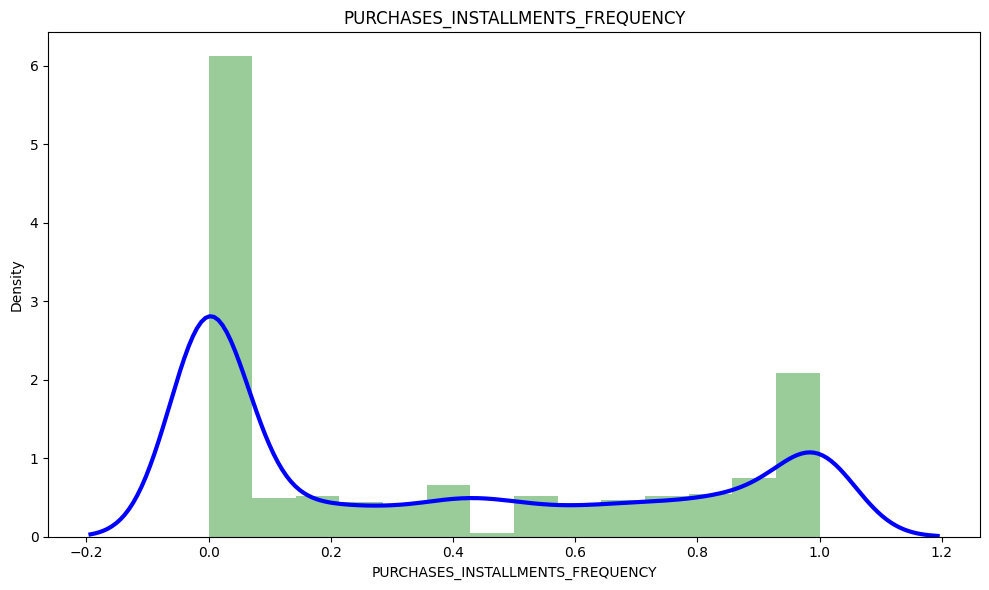

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


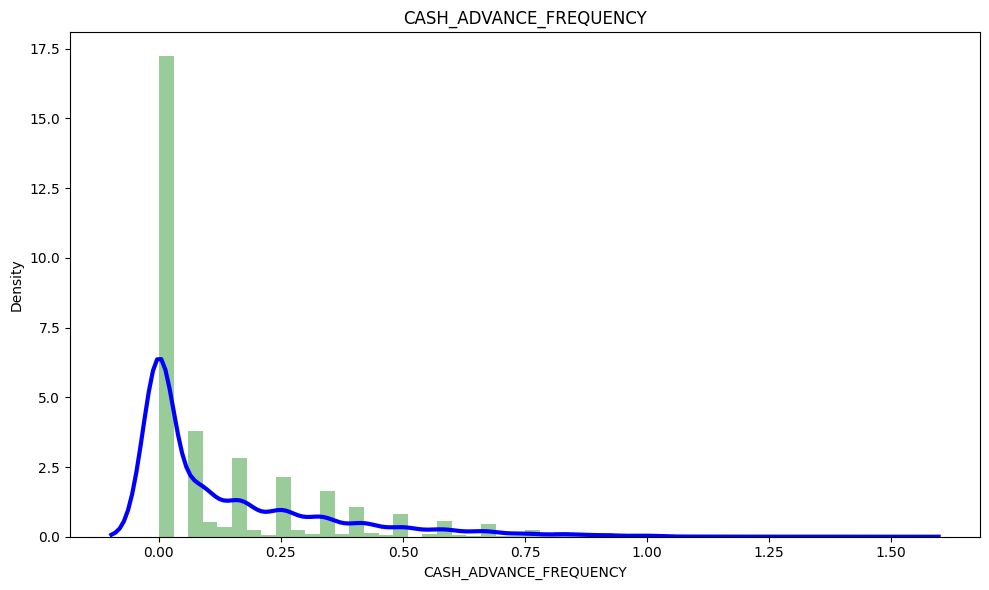

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


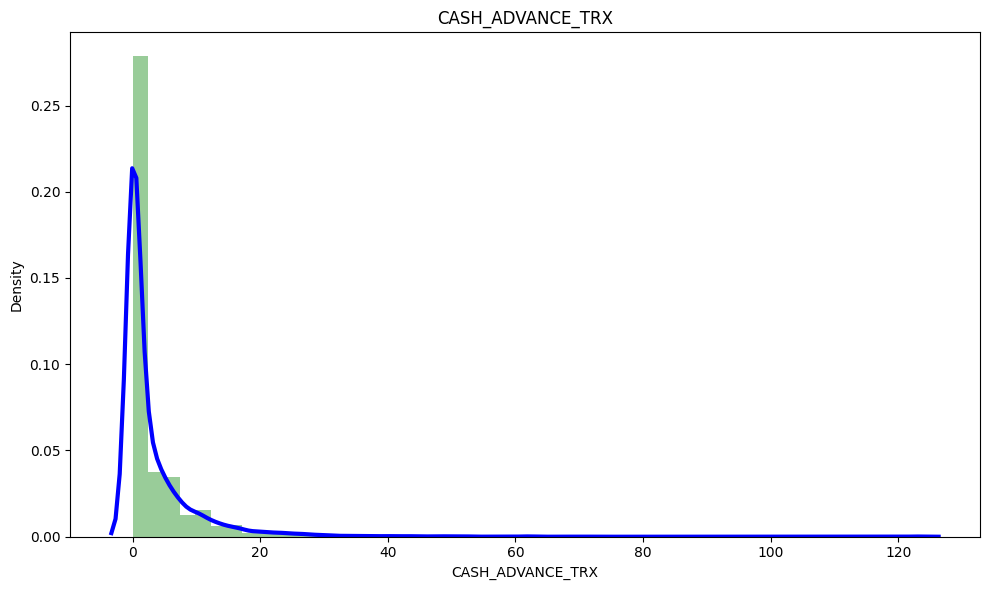

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


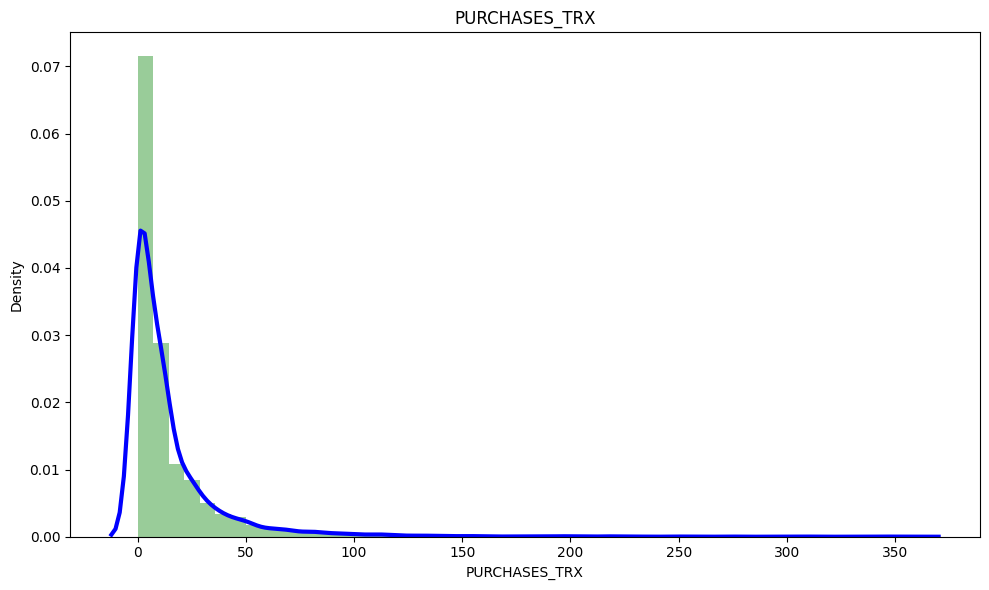

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


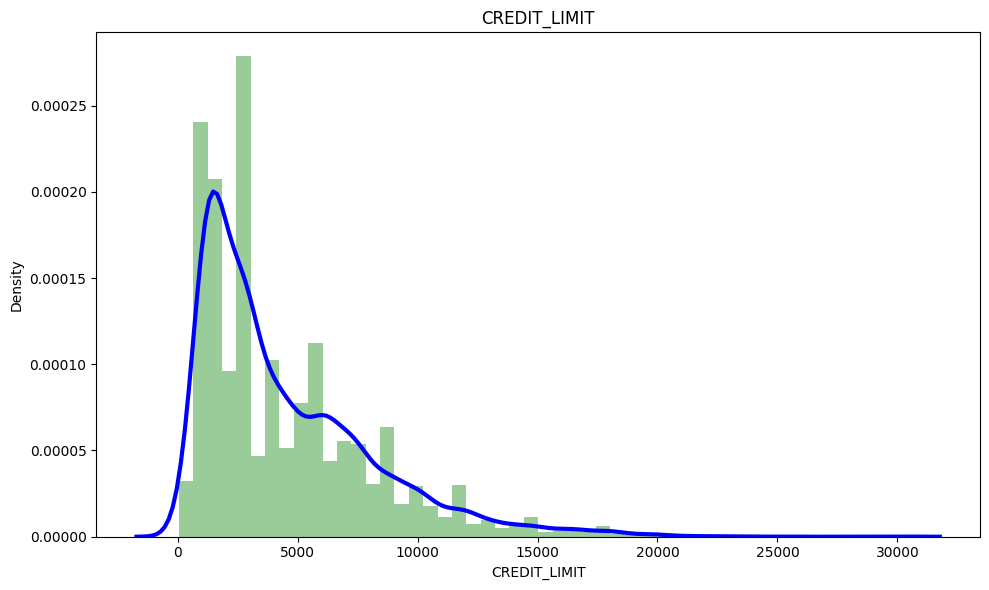

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


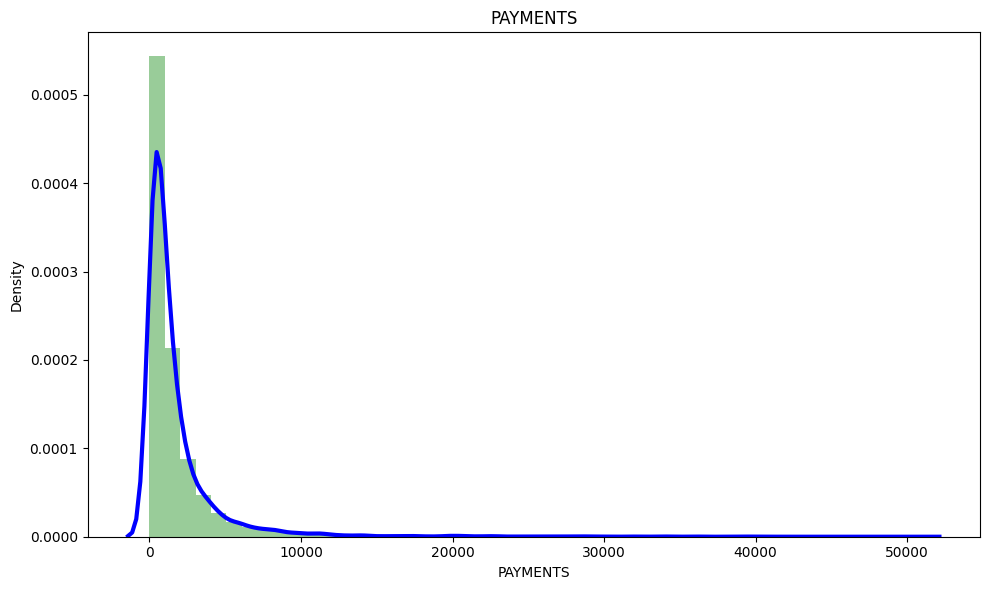

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


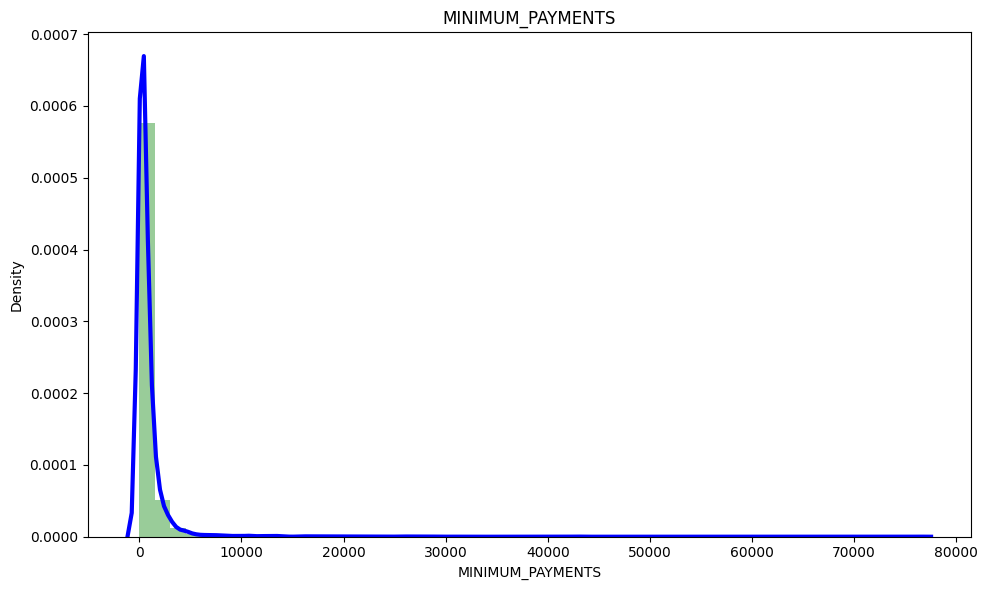

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


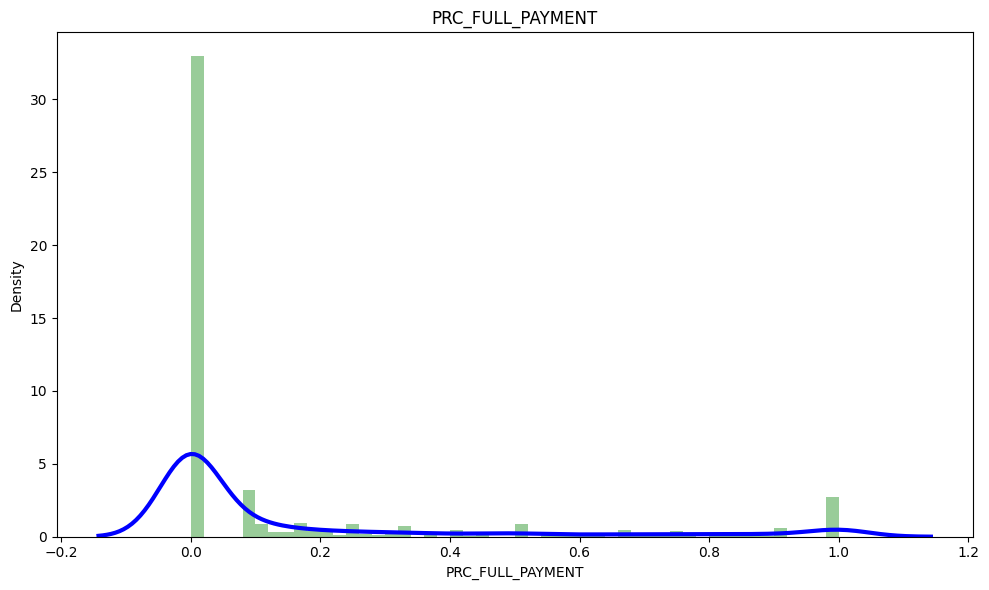

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\210537343.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},


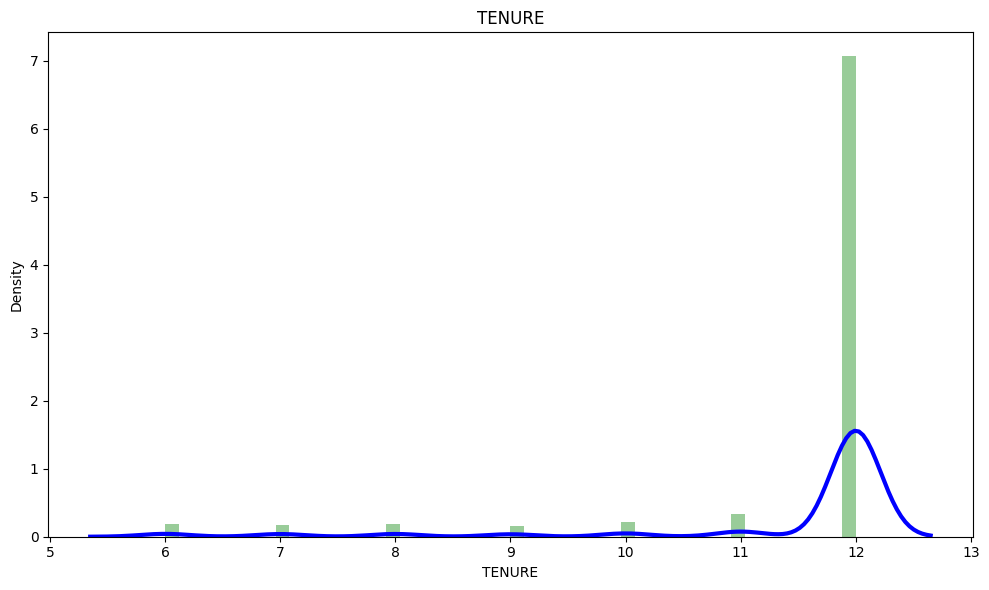

In [24]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.


# Ensure the "images" folder exists
if not os.path.exists("images"):
    os.makedirs("images")

# Loop to create and save the plots
for i in range(len(creditcard_df.columns)):
    plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'},
                 hist_kws={'color': 'g'})
    plt.title(creditcard_df.columns[i])
    plt.tight_layout()
    
    # Save the plot to the "images" folder with a meaningful name
    plt.savefig(f"images/{creditcard_df.columns[i]}_KDE_histogram.png")
    plt.show()
    plt.close()  # Close the plot to free up memory


In [25]:
# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11-12 years tenure

<Axes: >

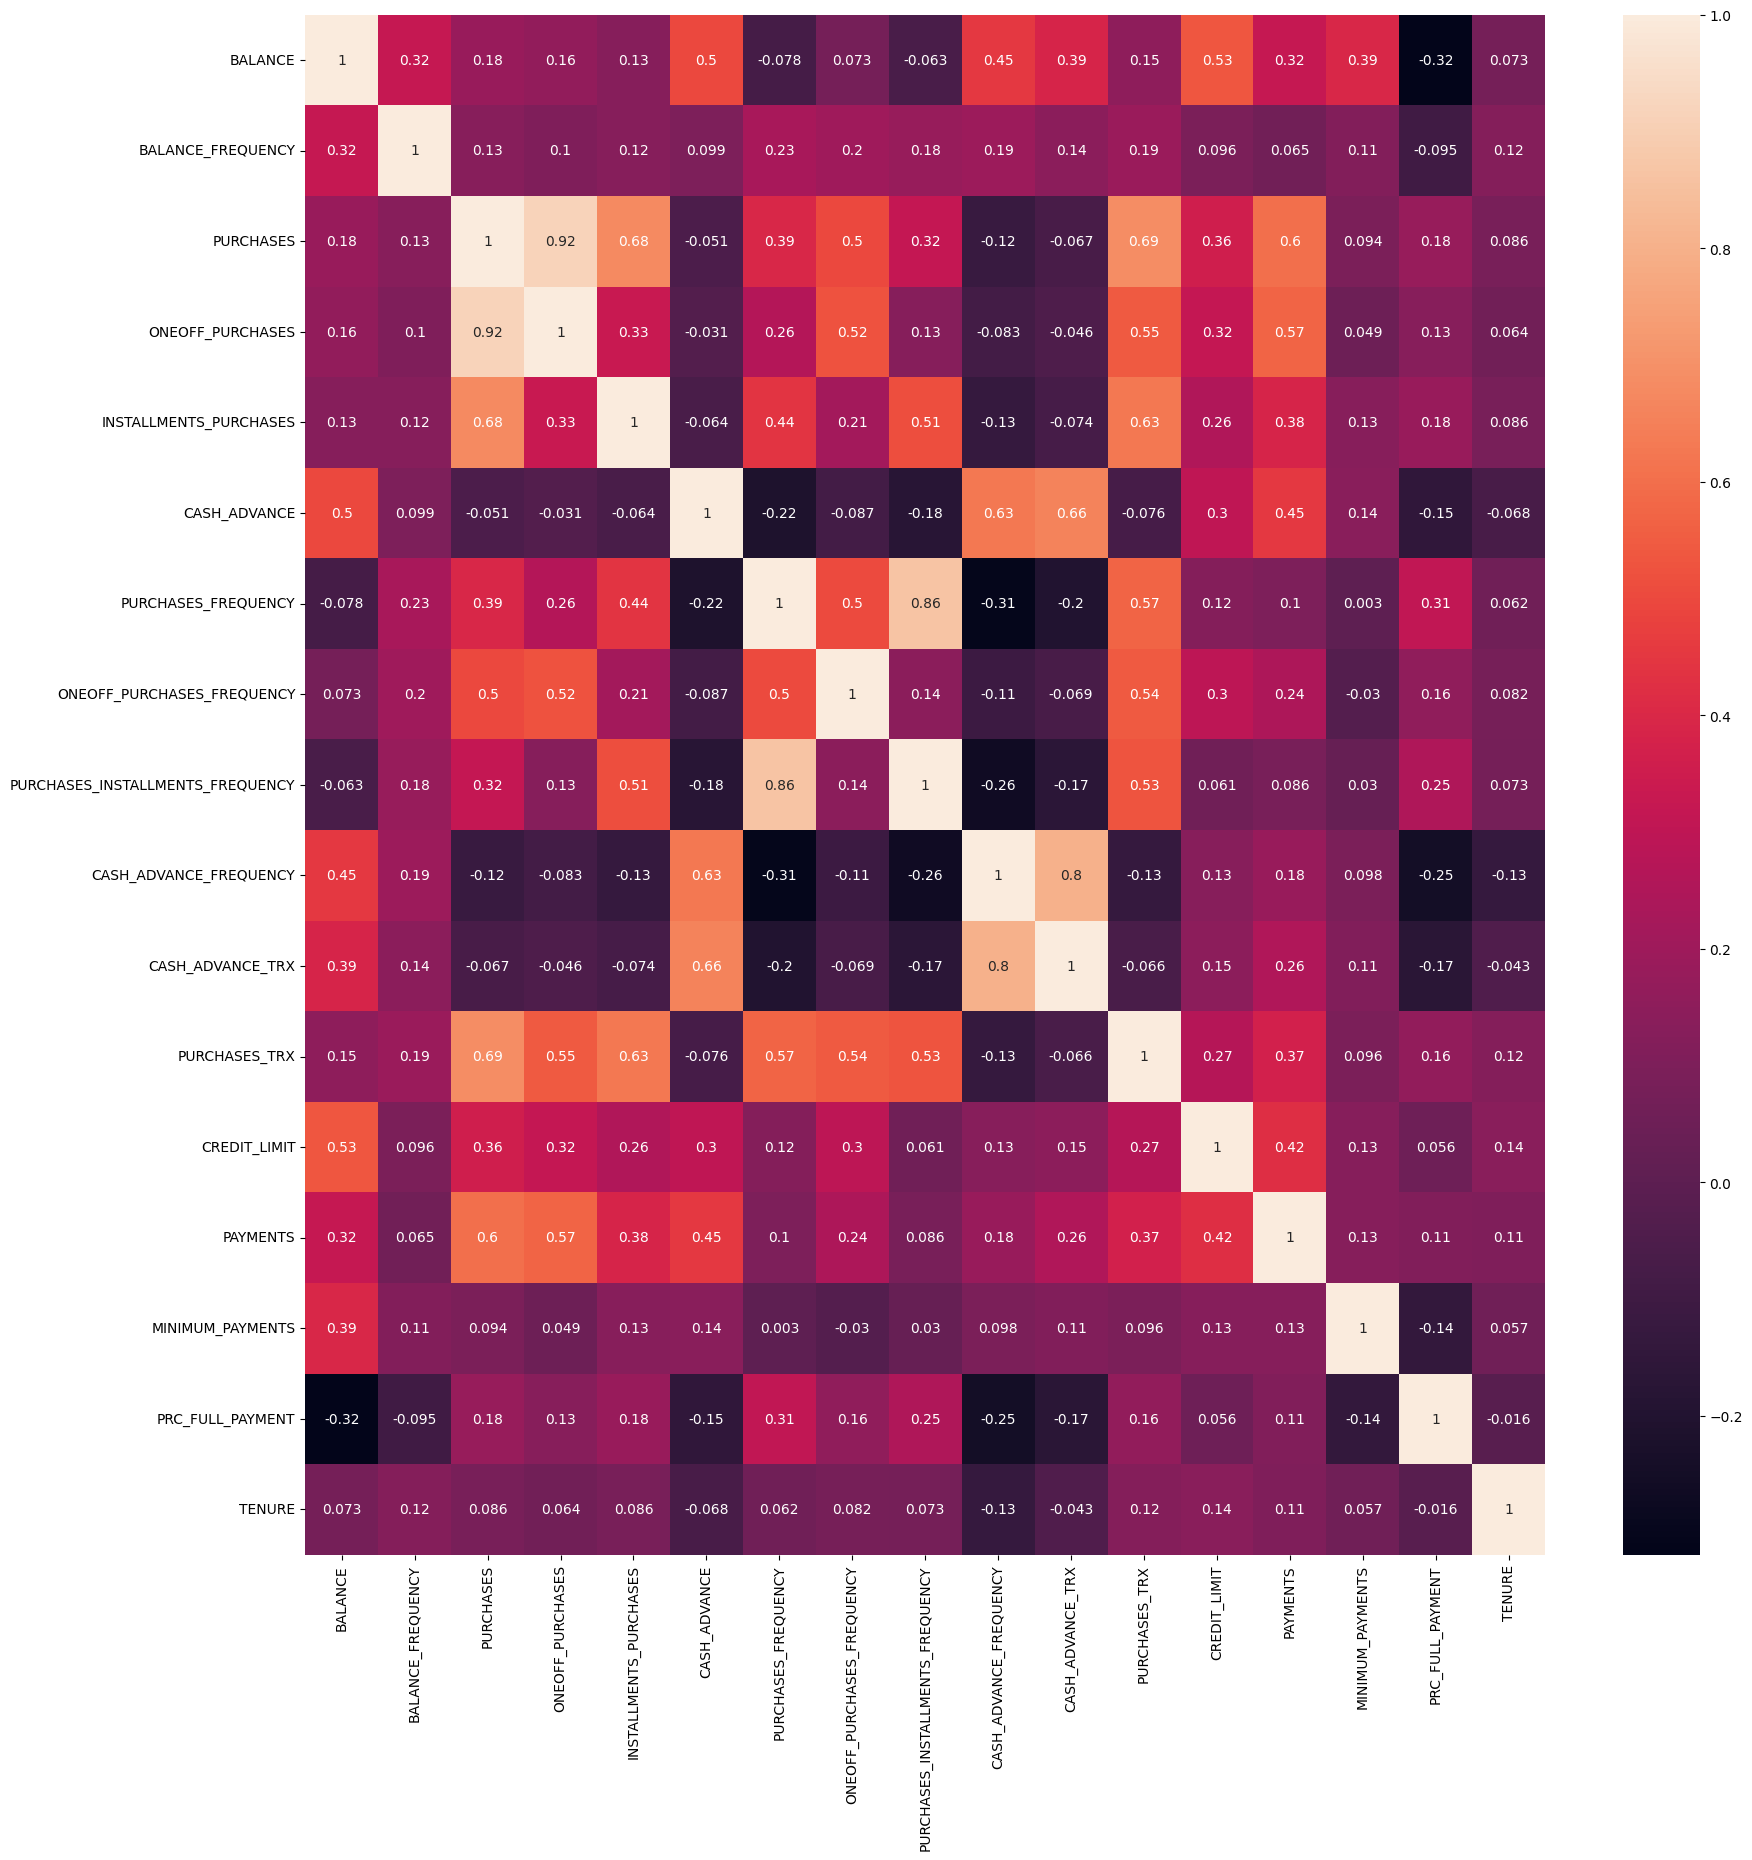

In [26]:
# Okay, Let's look at the correlations between variables.

correlations = creditcard_df.corr()

f,ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [27]:
# Most correlations are between related categories ie. Purchases Frequency and Purchase Transactions ect.

# TASK #4: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD AND SCALED INERTIA


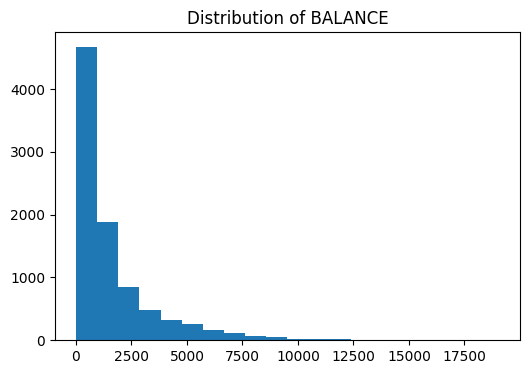

c:\Users\tariq\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


BALANCE does not appear to have a normal distribution.


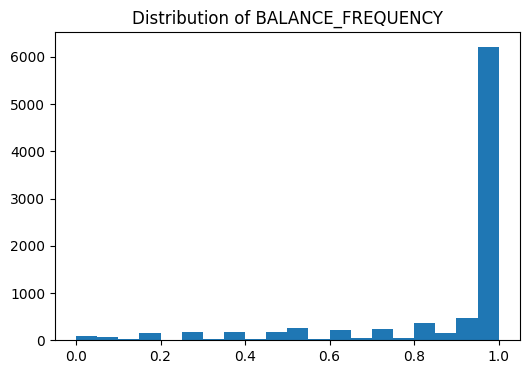

BALANCE_FREQUENCY does not appear to have a normal distribution.


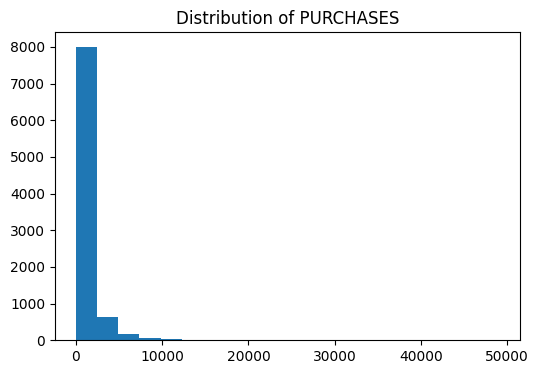

PURCHASES does not appear to have a normal distribution.


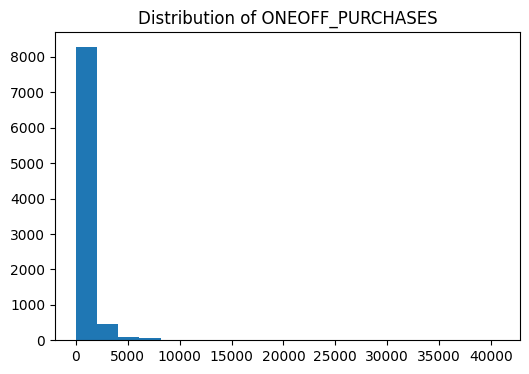

ONEOFF_PURCHASES does not appear to have a normal distribution.


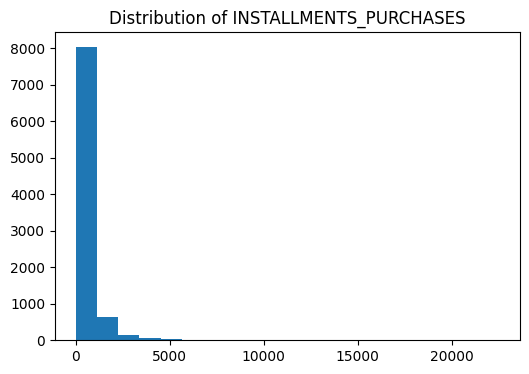

INSTALLMENTS_PURCHASES does not appear to have a normal distribution.


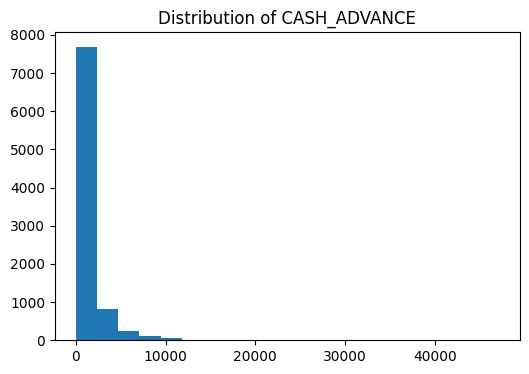

CASH_ADVANCE does not appear to have a normal distribution.


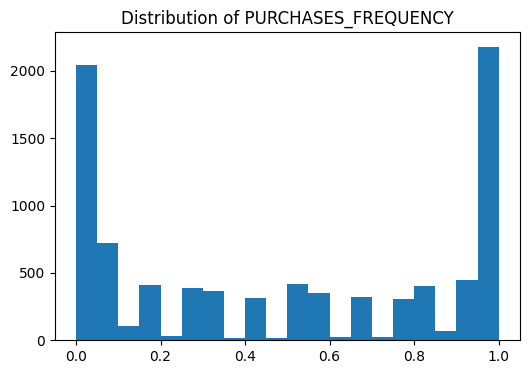

PURCHASES_FREQUENCY does not appear to have a normal distribution.


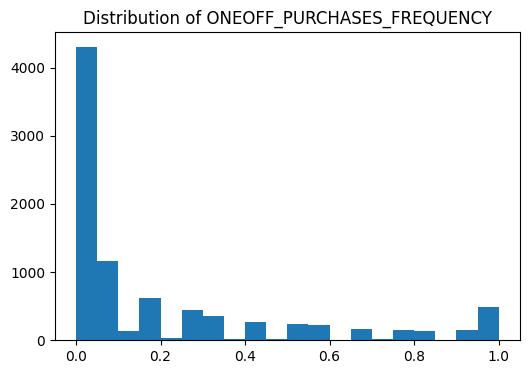

ONEOFF_PURCHASES_FREQUENCY does not appear to have a normal distribution.


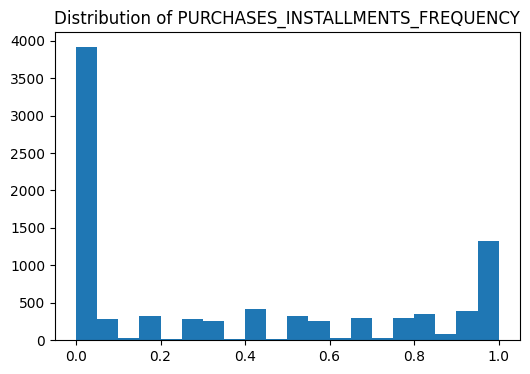

PURCHASES_INSTALLMENTS_FREQUENCY does not appear to have a normal distribution.


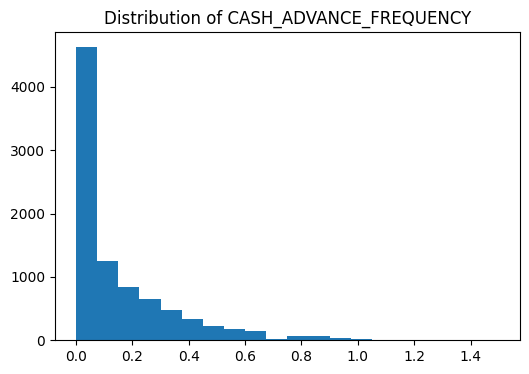

CASH_ADVANCE_FREQUENCY does not appear to have a normal distribution.


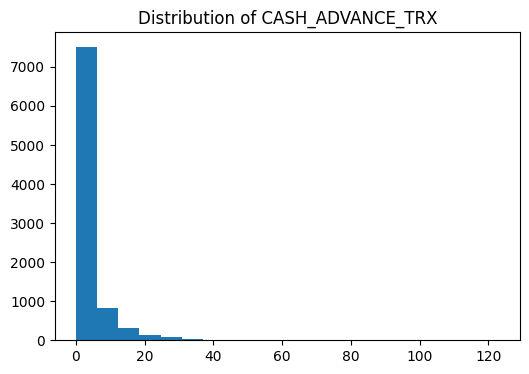

CASH_ADVANCE_TRX does not appear to have a normal distribution.


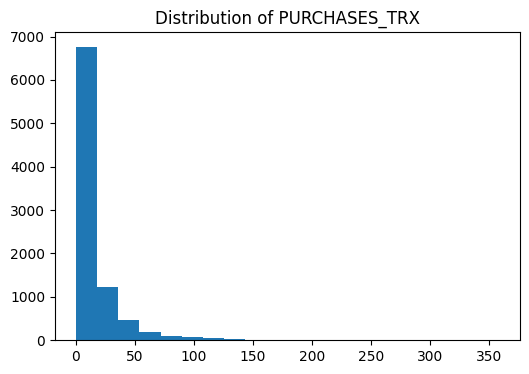

PURCHASES_TRX does not appear to have a normal distribution.


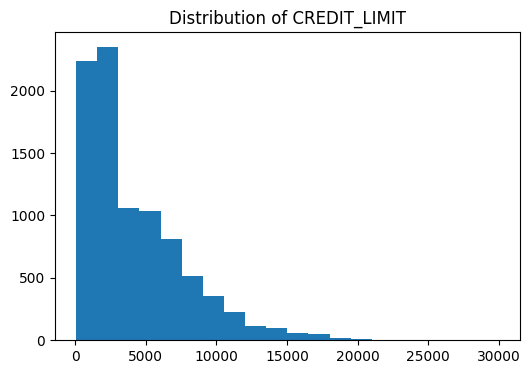

CREDIT_LIMIT does not appear to have a normal distribution.


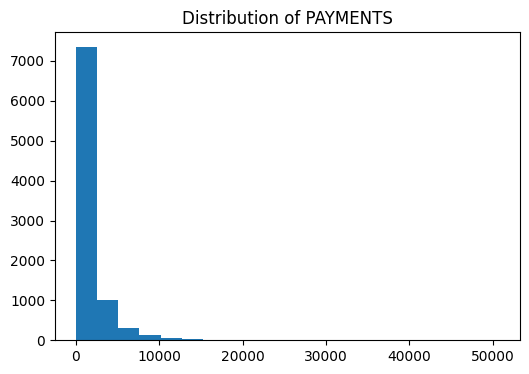

PAYMENTS does not appear to have a normal distribution.


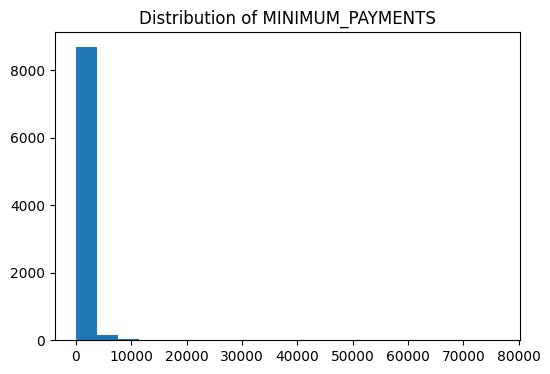

MINIMUM_PAYMENTS does not appear to have a normal distribution.


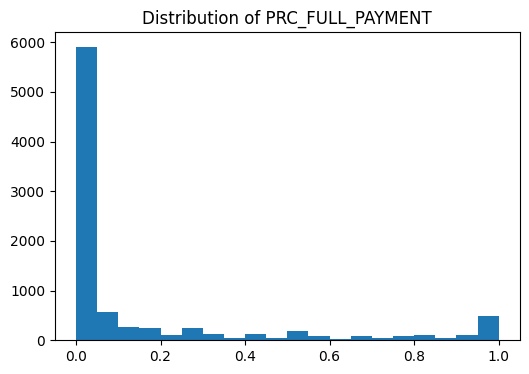

PRC_FULL_PAYMENT does not appear to have a normal distribution.


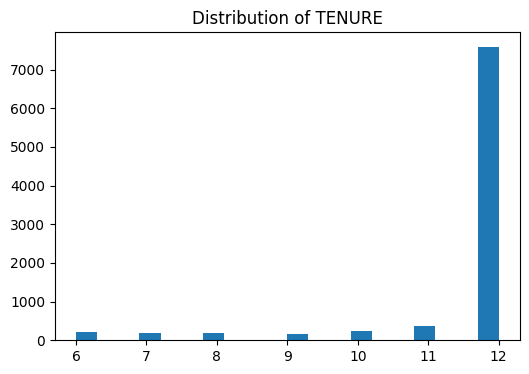

TENURE does not appear to have a normal distribution.
Selected Scaler: MinMaxScaler
Selected Variables: BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE


In [28]:
'''Let's scale the data first. knowing the distribution of the data is important when scaling, 
if most of the variables are normally distibuted we can get away with using the StandarScaler because it is not sensitive to outliers,
However, if most the variable have a non-normal distibution MinMaxScaler would be a better choice since in this data's case we do not want to mitigate outliers.
We'll write some code to pick the best scaler based on the distributions.'''


# Initialize counters for normal and non-normal distributions
normal_distribution_count = 0
non_normal_distribution_count = 0

# Lists to store the distribution assessment results for each variable
normal_distribution_variables = []
non_normal_distribution_variables = []

# Check the distribution of each variable
for column in creditcard_df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(creditcard_df[column], bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()
    
    # Perform a normality test (e.g., Shapiro-Wilk)
    stat, p_value = stats.shapiro(creditcard_df[column])
    
    if p_value > 0.05:
        print(f"{column} appears to have a roughly normal distribution.")
        normal_distribution_count += 1
        normal_distribution_variables.append(column)
    else:
        print(f"{column} does not appear to have a normal distribution.")
        non_normal_distribution_count += 1
        non_normal_distribution_variables.append(column)

# Determine which scaler to use based on the majority of distributions
if normal_distribution_count > non_normal_distribution_count:
    scaler = StandardScaler()  # More variables have normal distribution
    selected_variables = normal_distribution_variables
    scaler_type = "StandardScaler"
else:
    scaler = MinMaxScaler()  # More variables have non-normal distribution
    selected_variables = non_normal_distribution_variables
    scaler_type = "MinMaxScaler"

# Apply the selected scaler to the chosen variables
creditcard_df_scaled = scaler.fit_transform(creditcard_df[selected_variables])

# Print the chosen scaler and selected variables
print(f"Selected Scaler: {scaler_type}")
print(f"Selected Variables: {', '.join(selected_variables)}")



In [29]:
# MinMaxScaler was picked since there appears to be no normally distibuted variables.

In [30]:
# Let's run the elbow method first.

In [31]:
score_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    score_1.append(kmeans.inertia_)

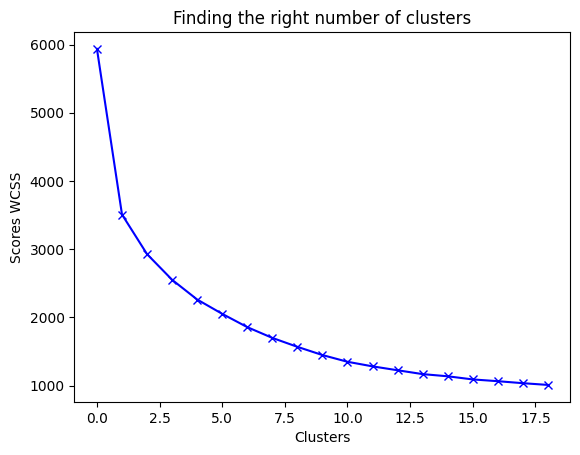

In [32]:
plt.plot(score_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [33]:

# From this we can observe that the values does not reduce linearly until 7th or 8th cluster.

# Let's try a different approached called Scaled Inertia that uses weighted inertia and automatically picks the number of clusters.

In [34]:
# First let's create a function to find the scaled inertia.

def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: array 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

In [35]:
# Next we create a function to find the best KMeans.

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

The Best K is:  10


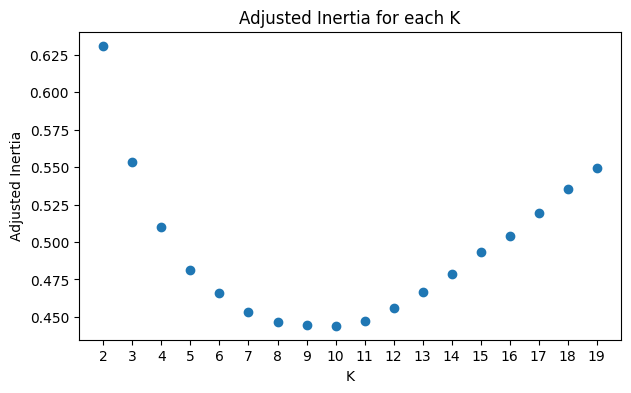

In [36]:
# Choose k range
k_range = range(2, 20)

# Compute adjusted inertia
best_k, results = chooseBestKforKMeans(creditcard_df_scaled, k_range)

print('The Best K is: ',best_k)


# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.plot(results, 'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2, 20, 1))
plt.show()

In [37]:
# Based on the Scaled Inertia method using the MinMaxScaler the n_clusters = 10 as the best k

# TASK #5: APPLY K-MEANS METHOD

In [38]:
kmeans = KMeans(10)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

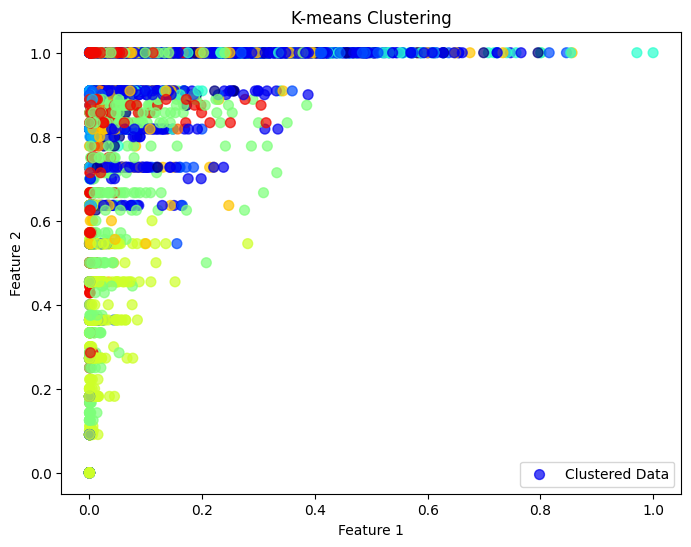

In [39]:

# Let's Plot the clusters

# Define the number of clusters
n_clusters = len(set(labels))

# Create a color map for the clusters
colors = plt.cm.jet(labels / n_clusters)

# Create a scatter plot for the K-means clusters
plt.figure(figsize=(8, 6))
plt.scatter(creditcard_df_scaled[:, 0], creditcard_df_scaled[:, 1], c=colors, marker='o', s=50, alpha=0.7, label='Clustered Data')

# Customize plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Show a legend
plt.legend(loc='best')

# Save the plot to an image file if needed
plt.savefig('images/kmeans_clusters.png')  

# Show the plot
plt.show()


In [40]:
# Let's create a dataframe of the cluster centers.
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [41]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.094529,0.971113,0.031931,0.035962,0.004464,0.013737,0.738659,0.709656,0.094200,0.068008,0.018594,0.053870,0.166805,0.035608,0.009602,0.076466,0.963359
1,0.120195,0.975150,0.003773,0.004132,0.000741,0.035300,0.073107,0.057162,0.015703,0.155930,0.046448,0.004127,0.141132,0.030773,0.014491,0.020900,0.979098
2,0.076736,0.926914,0.022974,0.006287,0.038699,0.013602,0.954795,0.088332,0.926663,0.053621,0.016100,0.068429,0.129580,0.030597,0.017255,0.061746,0.989235
3,0.005941,0.902111,0.022141,0.004081,0.040915,0.000769,0.861539,0.062799,0.815712,0.003672,0.001061,0.052954,0.134504,0.024347,0.002680,0.807378,0.962429
4,0.158841,0.989411,0.078956,0.061499,0.060675,0.019959,0.968212,0.749151,0.848261,0.083017,0.028353,0.163844,0.252321,0.076636,0.015227,0.065431,0.987645
5,0.072237,0.762798,0.005243,0.005939,0.000669,0.039807,0.121991,0.099774,0.020256,0.189479,0.042801,0.005327,0.102053,0.017257,0.006602,0.046869,0.235499
6,0.007807,0.342614,0.006614,0.006184,0.003217,0.011317,0.159216,0.073223,0.082378,0.031458,0.008902,0.007551,0.132545,0.030079,0.003717,0.216633,0.961884
7,0.078627,0.912063,0.015370,0.007705,0.019576,0.015260,0.550041,0.115986,0.448679,0.067405,0.022192,0.030694,0.141361,0.026407,0.011849,0.067248,0.981815
8,0.021226,0.962208,0.087702,0.080064,0.046106,0.002450,0.927456,0.869806,0.503072,0.016233,0.005140,0.134078,0.250436,0.082722,0.003176,0.876638,0.973659
9,0.039060,0.868158,0.013338,0.004941,0.020125,0.017619,0.884724,0.104348,0.735371,0.084184,0.020422,0.030394,0.075006,0.011624,0.005412,0.286785,0.201058


In [42]:
# In order to understand what these numbers mean, let's perform inverse transformation

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns= [creditcard_df.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1800.135214,0.971113,1565.874336,1465.870137,100.439237,647.544375,0.738659,0.709656,0.094200,0.102012,2.287023,19.285496,5045.801527,1806.079635,733.659374,0.076466,11.780153
1,2288.883917,0.975150,185.021163,168.434473,16.683153,1663.966855,0.073107,0.057162,0.015703,0.233895,5.713088,1.477579,4276.912582,1560.838752,1107.197347,0.020900,11.874590
2,1461.303098,0.926914,1126.629081,256.278100,870.735106,641.160515,0.954795,0.088332,0.926663,0.080431,1.980243,24.497720,3930.927052,1551.924938,1318.404909,0.061746,11.935410
3,113.139276,0.902111,1085.761644,166.338678,920.590729,36.231416,0.861539,0.062799,0.815712,0.005508,0.130508,18.957627,4078.393683,1234.909576,204.752327,0.807378,11.774576
4,3024.829022,0.989411,3871.949290,2506.755946,1365.193344,940.802893,0.968212,0.749151,0.848261,0.124525,3.487382,58.656151,7607.018927,3887.089082,1163.466117,0.065431,11.925868
5,1375.627166,0.762798,257.125522,242.075128,15.050394,1876.395298,0.121991,0.099774,0.020256,0.284219,5.264501,1.907193,3106.483641,875.278665,504.485704,0.046869,7.412993
6,148.678251,0.342614,324.349191,252.048630,72.375534,533.465884,0.159216,0.073223,0.082378,0.047188,1.094930,2.703344,4019.726717,1525.638121,283.994879,0.216633,11.771305
7,1497.304884,0.912063,753.731300,314.072467,440.458729,719.311805,0.550041,0.115986,0.448679,0.101107,2.729602,10.988615,4283.748299,1339.379861,905.337852,0.067248,11.890892
8,404.202994,0.962208,4300.876034,3263.500345,1037.375690,115.483580,0.927456,0.869806,0.503072,0.024349,0.632184,48.000000,7550.566876,4195.776634,242.692334,0.876638,11.841954
9,743.816955,0.868158,654.099127,201.407698,452.810476,830.511209,0.884724,0.104348,0.735371,0.126275,2.511905,10.880952,2296.428571,589.611063,413.561385,0.286785,7.206349


Cluster 0 - Occasional Spender with Low Balance:

Category: "Occasional Spender"
Description: Customers in this cluster have a relatively low balance, infrequently update it, and make moderate purchases, suggesting they use their credit cards for occasional spending.

Cluster 1 - Responsible Moderate Spender:

Category: "Moderate Spender"
Description: Customers in this cluster maintain a low balance but frequently update it, make moderate to high purchases (mainly installments), and exhibit responsible credit card usage.

Cluster 2 - Balanced Moderate Spender:

Category: "Balanced Spender"
Description: Customers in this cluster have a high balance, frequently update it, make moderate purchases (a mix of one-off and installments), and manage their credit card balance well.

Cluster 3 - High-Volume One-Off Spender:

Category: "One-Off Spender"
Description: Customers in this cluster maintain very high balances, frequently update them, and make high purchases, primarily through one-off transactions, indicating significant one-time expenses.

Cluster 4 - Balanced Moderate Spender (Installment Focus):

Category: "Balanced Spender"
Description: Customers in this cluster have a high balance, frequently update it, make moderate purchases (mainly through installment payments), and manage their credit card balance well.

Cluster 5 - High-Balance Low Spender:

Category: "Low Spender"
Description: Customers in this cluster maintain very high balances, frequently update them, but make low purchases and rarely engage in cash advances, suggesting they may use their credit cards as a financial tool rather than for spending.

Cluster 6 - Extremely High-Balance Low Spender:

Category: "Low Spender (Extremely High Balance)"
Description: Customers in this cluster have extremely high balances, frequently update them, but make very low purchases and rarely engage in cash advances, indicating an emphasis on credit card balance management.

Cluster 7 - High-Volume Spender with High Balance:

Category: "High Spender"
Description: Customers in this cluster have very high balances, frequently update them, make high purchases, and maintain a moderate cash advance frequency, indicating a substantial credit card usage pattern.

Cluster 8 - Moderate Spender with Low Payments:

Category: "Moderate Spender (Low Payments)"
Description: Customers in this cluster have moderate balances, make moderate purchases, but have lower payment amounts, possibly indicating a need for better payment management.

Cluster 9 - High Spender with Full Payments:

Category: "High Spender (Full Payments)"
Description: Customers in this cluster maintain a low balance, frequently update it, make high purchases, and exhibit a high percentage of full payments, suggesting responsible credit card usage with frequent full payments.

In [43]:
# concatenate the clusters labels to our original dataframe

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'Cluster':labels})], axis = 1)
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,9
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,9
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,9
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


In [44]:
# Lets see what clusters our earlier observation of the Max One-Off and Max Cash Advance Customers fall in.

creditcard_df_cluster[creditcard_df_cluster['ONEOFF_PURCHASES']== 40761.25]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12,4


In [45]:
# The customer above falls in cluster 6 which is Extremely High-Balance Low Spender

In [46]:
creditcard_df_cluster[creditcard_df_cluster['CASH_ADVANCE']== 47137.211760]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2159,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12,7


In [47]:
# The customer above falls in cluster 3 which is High-Volume One-Off Spender

In [48]:
# Plot histogram of various cluster

# Ensure the "images" folder exists
if not os.path.exists("images"):
    os.makedirs("images")

# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(10):
        plt.subplot(1, 10, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['Cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {}'.format(i, j))

    # Save the plot to an image file
    plt.savefig(f"images/{i}_cluster_histogram.png")  # Save each histogram as an image file
    
    # Close the plot to free up memory
    plt.close()

''' 
# Show the saved histograms
for i in creditcard_df.columns:
    image_path = f"images/{i}_cluster_histogram.png"
    image = plt.imread(image_path)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f'Histogram for {i}')
    plt.axis('off')
    plt.show()
    '''

' \n# Show the saved histograms\nfor i in creditcard_df.columns:\n    image_path = f"images/{i}_cluster_histogram.png"\n    image = plt.imread(image_path)\n    \n    plt.figure(figsize=(8, 6))\n    plt.imshow(image)\n    plt.title(f\'Histogram for {i}\')\n    plt.axis(\'off\')\n    plt.show()\n    '

# TASK 6: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [49]:
# Obtain the principal components
pca = PCA(n_components=2)
principle_comp =pca.fit_transform(creditcard_df_scaled)
principle_comp

array([[-0.48216436, -0.09765617],
       [-0.6085774 , -0.01937946],
       [ 0.30450697,  0.92094554],
       ...,
       [ 0.36038865, -0.42264684],
       [-0.64609505, -0.20433243],
       [-0.09459773,  0.39957787]])

In [50]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principle_comp, columns= ['pca1', 'pca2'])
pca_df.head()


,pca1,pca2
0,-0.482164,-0.097656
1,-0.608577,-0.019379
2,0.304507,0.920946
3,-0.588622,-0.005605
4,-0.554354,0.052965


In [51]:
# Concatenate the clusters labels to the dataframe

pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,Cluster
0,-0.482164,-0.097656,1
1,-0.608577,-0.019379,1
2,0.304507,0.920946,0
3,-0.588622,-0.005605,1
4,-0.554354,0.052965,1


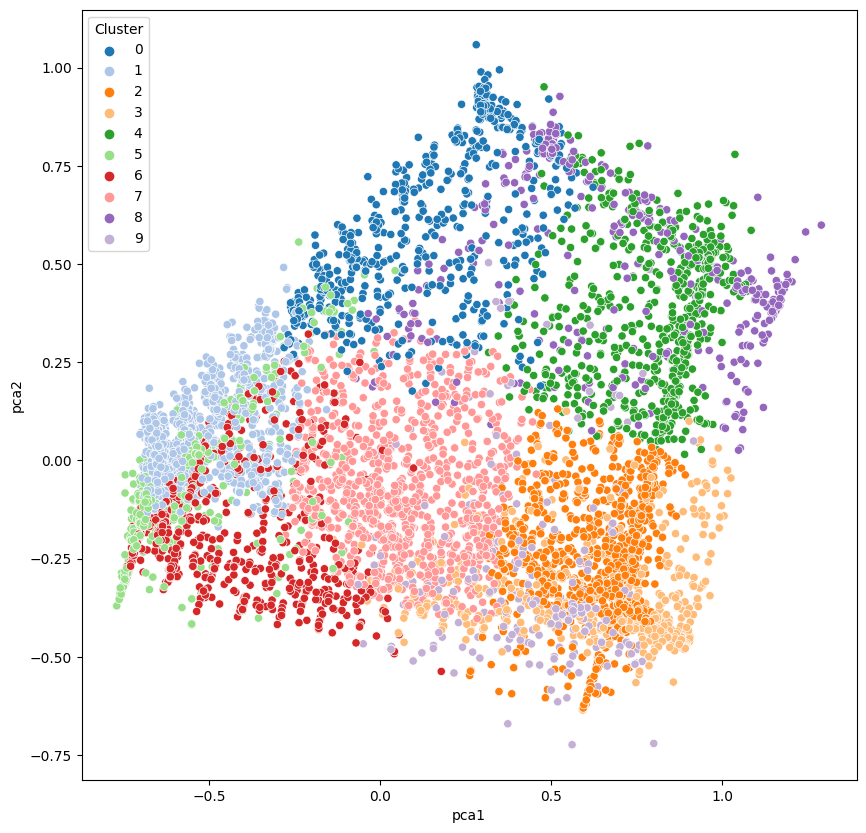

In [52]:
# Plot the PCA
cluster_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create a list of distinct colors for each cluster label
n_clusters = len(set(cluster_labels))
custom_palette = sns.color_palette("tab20", n_colors=n_clusters)


plt.figure(figsize= (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Cluster', data = pca_df, palette = custom_palette)



# TASK #7: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [53]:
# In this section we will use Autoencoden to reduce the dimensions and then run the KMeans Clustering again on the reduced dimensions

input_df = Input(shape=(17,))

x = Dense(7, activation ='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)


#Autoencoder
autoencoder = Model(input_df, decoded)

#Encoder
encoder = Model(input_df,encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')


In [54]:
autoencoder.fit(creditcard_df_scaled,creditcard_df_scaled, batch_size=128, epochs=25, verbose=1 )

Epoch 1/25

70/70 [==============================] - 7s 49ms/step - loss: 0.0350
Epoch 2/25
70/70 [==============================] - 4s 51ms/step - loss: 0.0110
Epoch 3/25
70/70 [==============================] - 3s 48ms/step - loss: 0.0068
Epoch 4/25
70/70 [==============================] - 3s 48ms/step - loss: 0.0055
Epoch 5/25
70/70 [==============================] - 3s 48ms/step - loss: 0.0048
Epoch 6/25
70/70 [==============================] - 4s 54ms/step - loss: 0.0045
Epoch 7/25
70/70 [==============================] - 3s 50ms/step - loss: 0.0042
Epoch 8/25
70/70 [==============================] - 3s 45ms/step - loss: 0.0040
Epoch 9/25
70/70 [==============================] - 3s 43ms/step - loss: 0.0038
Epoch 10/25
70/70 [==============================] - 3s 42ms/step - loss: 0.0036
Epoch 11/25
70/70 [==============================] - 3s 40ms/step - loss: 0.0035
Epoch 12/25
70/70 [==============================] - 3s 42ms/step - loss: 0.0034
Epoch 13/25
70/70 [=================

In [55]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [57]:
pred = encoder.predict(creditcard_df_scaled)
pred.shape

280/280 [==============================] - 1s 4ms/step


(8950, 10)

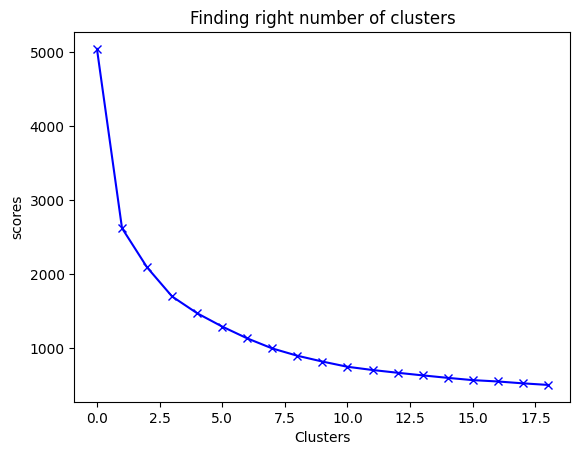

In [59]:
# Let's use the Elbow Method to get the number of clusters in the reduced dimensions.

scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\1165004549.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score_1, 'bx-', color='r')
C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\1165004549.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color='g')


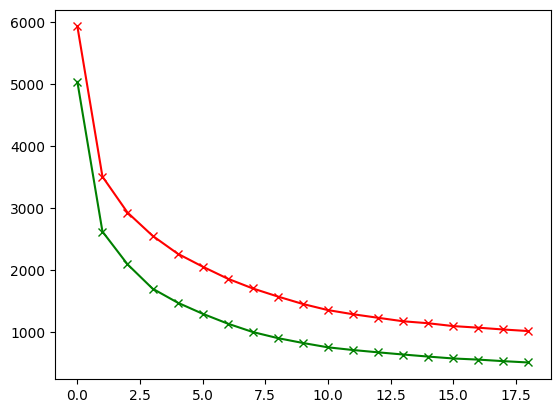

In [60]:
plt.plot(score_1, 'bx-', color='r')
plt.plot(scores_2, 'bx-', color='g')

The Best K is:  8


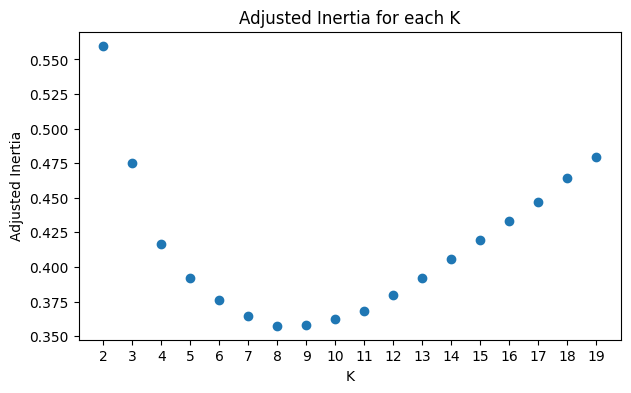

In [58]:
# Next lets use the Scaled_Inertia Method to tells us the number of clusters

# Choose k range
k_range = range(2, 20)

# Compute adjusted inertia
best_k, results = chooseBestKforKMeans(pred, k_range)

print('The Best K is: ',best_k)


# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.plot(results, 'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2, 20, 1))
plt.show()

In [61]:
kmeans = KMeans(8)
kmeans.fit(pred)
labels = kmeans.labels_

In [62]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [63]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1','pca2'])

In [64]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.445422,0.066537,3
1,-0.303891,0.496379,3
2,0.151897,-0.767115,7
3,-0.646982,-0.106579,0
4,-0.501442,0.072493,3


C:\Users\tariq\AppData\Local\Temp\ipykernel_8848\3840113279.py:2: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  ax = sns.scatterplot(x = 'pca1', y= 'pca2', hue = 'cluster', data = pca_df, palette= custom_palette)


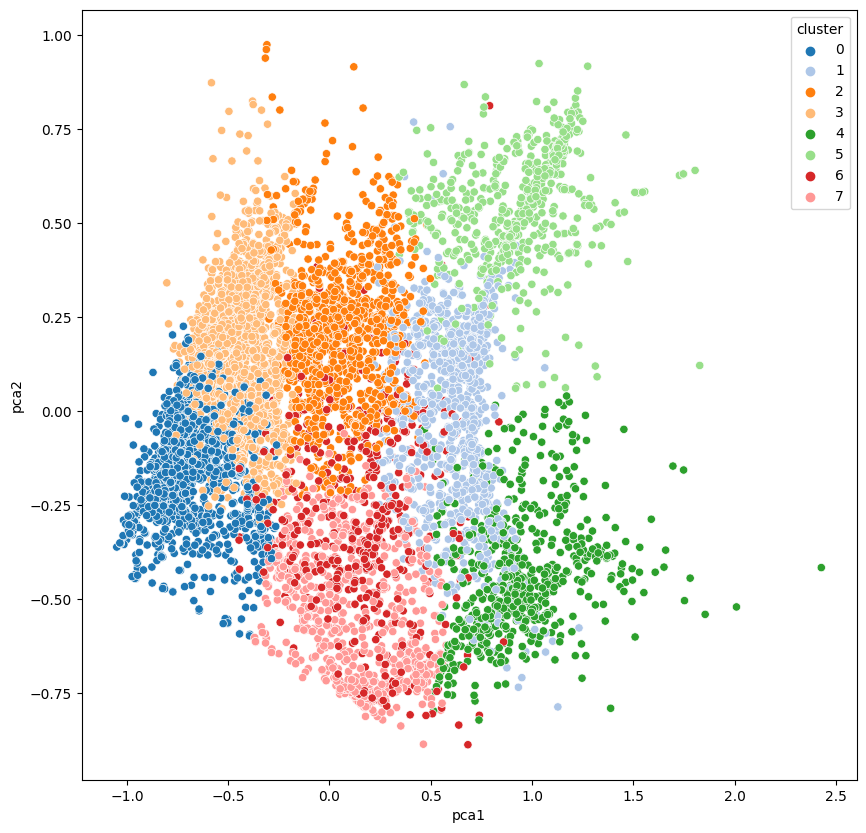

In [65]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y= 'pca2', hue = 'cluster', data = pca_df, palette= custom_palette)

In [67]:
# Assuming df_cluster_dr is your DataFrame with the cluster assignments
cluster_means = df_cluster_dr.groupby('cluster').mean()
cluster_means

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,611.888206,0.583020,345.470642,326.666876,19.050941,832.363434,0.137231,0.112495,0.024159,0.116040,2.375872,2.662483,3416.058426,1153.021056,417.599207,0.051483,10.600418
1,2132.057673,0.985213,1596.887414,577.423559,1019.542038,664.037690,0.947823,0.180500,0.915042,0.083424,1.892015,30.885171,4770.266160,1941.550735,1516.015602,0.033737,11.961977
2,1179.770395,0.772748,518.588630,148.554389,370.903124,564.415397,0.510318,0.051063,0.449088,0.054058,1.239965,8.602967,4071.334241,1296.314343,955.530818,0.207262,11.891798
3,2206.394559,0.960282,191.534857,165.844555,25.783787,1638.513229,0.088637,0.062458,0.026298,0.237595,5.773787,1.705388,4267.356214,1521.769972,986.678692,0.035476,11.854031
4,1272.883551,0.983691,4623.136984,3154.009913,1469.127071,247.279549,0.983746,0.844071,0.818167,0.037684,0.899480,62.601386,7464.592721,4370.316391,486.672187,0.475032,11.901213
5,104.519264,0.940524,939.425016,76.373539,864.218653,28.085770,0.916471,0.031294,0.870916,0.004126,0.063312,17.165584,3735.271547,1025.731515,203.440919,0.742641,11.303571
6,2742.765659,0.944706,1348.915482,738.821285,610.636365,2429.553164,0.802700,0.258045,0.631790,0.346954,9.981928,19.698795,5022.991968,2254.613305,1246.698580,0.042048,9.773092
7,1378.928746,0.942334,1833.770228,1653.896707,179.873521,521.244920,0.798877,0.745029,0.156781,0.070457,1.502008,21.946452,5503.249361,2089.286765,586.464483,0.233859,11.783133



Cluster 0 - "Low Balance, Low Activity Spender":
- Customers in this cluster have the lowest balance and tend to engage in purchases infrequently. The majority of their purchases are one-off rather than installments, suggesting occasional, significant spending. However, they do take cash advances relatively often considering their low purchase frequency.

Cluster 1 - "High Balance, Controlled Spender":
- This cluster includes customers with high balances who update their balances frequently and engage in purchases quite actively. They have a balanced mix of one-off and installment purchases, indicating a controlled approach to spending. Their cash advance usage is moderate, and they have a high credit limit, suggesting good financial management.

Cluster 2 - "Moderate Balance, Diverse Spender":
- Customers here have moderate balances and engage in both one-off and installment purchases. Their purchase frequency is average, and they use cash advances less frequently than the first two clusters. They tend to have a reasonable credit limit and manage their finances averagely in terms of payments and full payment percentages.

Cluster 3 - "High Balance, Low Purchase Frequency":
- This cluster is characterized by high balances and very low purchase frequencies. Their purchases are minor and infrequent, and they rely more on cash advances. They have a higher number of cash advance transactions despite their low purchase frequency, indicating a preference for cash liquidity.

Cluster 4 - "Active, High Spending":
- Customers in this cluster have very high purchase activities, especially in one-off transactions, which suggests that they make large, infrequent purchases. They also have the highest credit limit, which aligns with their spending behavior. They maintain a good balance and tend to pay a significant portion of their bill in full.

Cluster 5 - "Conservative, Low Balance Spender":
- With the lowest cash advance usage and very high purchase frequency, especially in installments, these customers seem to use their credit cards cautiously for smaller, regular expenses rather than large purchases or cash advances. They exhibit high tenure and a high percentage of full payment, indicating disciplined financial behavior.

Cluster 6 - "High Balance, Cash Advance User":
- This cluster's defining characteristic is a very high balance coupled with the highest cash advance usage and frequency, indicating a reliance on credit for liquidity rather than purchases. Their purchase frequency is somewhat lower, and they have a long tenure, which might suggest established credit lines used for managing cash flow rather than spending.

Cluster 7 - "Balanced, Frequent Purchaser":
- Customers in this cluster maintain high balances and engage frequently in both one-off and installment purchases. They have a moderate use of cash advances and a high credit limit. Their payment behavior is stable, with a moderate percentage of full payments, suggesting they are regular credit card users for everyday spending.


Cluster 0 - "Low Balance, Low Activity Spender":
- **Marketing Recommendation**: Offer incentives for increased card usage, such as rewards points for every dollar spent or cashback bonuses for reaching certain spending thresholds. This could encourage more frequent use.

Cluster 1 - "High Balance, Controlled Spender":
- **Marketing Recommendation**: Target with premium card offers that provide benefits on high spending and balance maintenance, like higher reward points for travel and dining, or access to exclusive events and services.

Cluster 2 - "Moderate Balance, Diverse Spender":
- **Marketing Recommendation**: Introduce a flexible rewards program that benefits both one-off and installment purchases, like special discounts or installment plans with partner merchants, to cater to their diverse spending.

Cluster 3 - "High Balance, Low Purchase Frequency":
- **Marketing Recommendation**: Offer financial products such as savings accounts or investment plans that reward the parking of high balances, and promote low-interest cash advance options.

Cluster 4 - "Active, High Spending":
- **Marketing Recommendation**: Provide offers on high-value transactions, partnerships with luxury brands, and high-tier reward programs that align with their spending patterns.

Cluster 5 - "Conservative, Low Balance Spender":
- **Marketing Recommendation**: Promote budgeting tools and apps that integrate with their credit card, along with cashback offers on daily spending categories like groceries and fuel.

Cluster 6 - "High Balance, Cash Advance User":
- **Marketing Recommendation**: Offer special rates or fee waivers on cash advances, and introduce them to credit line increase options if they maintain their account well, to support their need for liquidity.

Cluster 7 - "Balanced, Frequent Purchaser":
- **Marketing Recommendation**: Create bundle offers or tiered rewards that increase with purchase frequency to encourage continued usage, and offer bonus points for use in a loyalty program with a wide range of redemption options.